## Cloth Recogniser

## cnn(convoloational neural network)

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train=x_train/255
x_test=x_test/255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=x_train[0].shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=757,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 757)              

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [10]:
trained_model=model.fit(x_train,y_train,verbose=1,epochs=5)


Epoch 1/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.4303 - accuracy: 0.8417
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3047 - accuracy: 0.8884
Epoch 3/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2613 - accuracy: 0.9025
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2303 - accuracy: 0.9143
Epoch 5/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2050 - accuracy: 0.9240


In [11]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

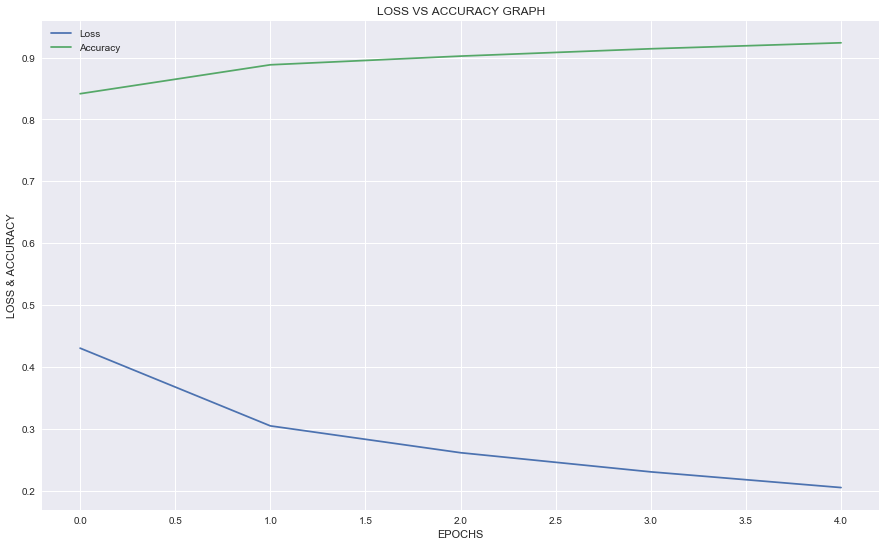

In [12]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(trained_model.history["loss"])
ax.plot(trained_model.history["accuracy"])
ax.legend(["Loss", "Accuracy"])
ax.set(title = "LOSS VS ACCURACY GRAPH", xlabel = "EPOCHS", ylabel = "LOSS & ACCURACY")
plt.show()

In [13]:
y_pred = model.predict_classes(x_test)

In [14]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.86      0.85      1000
           3       0.85      0.96      0.90      1000
           4       0.85      0.84      0.85      1000
           5       0.97      0.97      0.97      1000
           6       0.80      0.66      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [15]:
cm = confusion_matrix(y_test, y_pred)

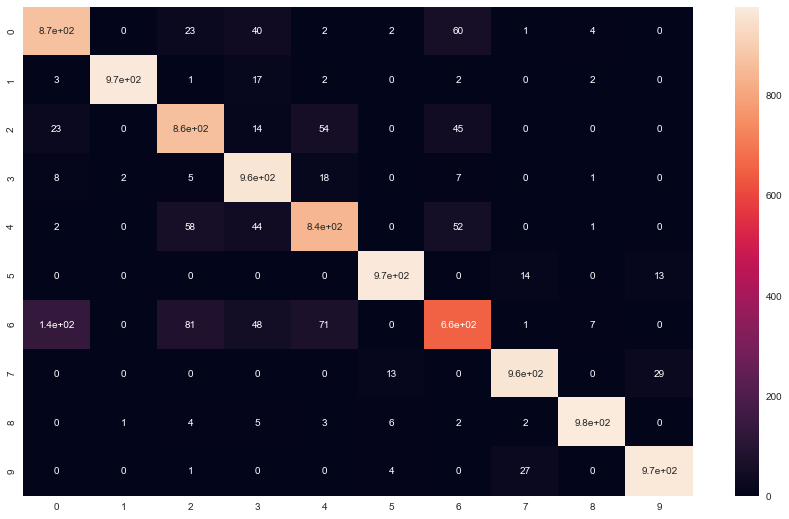

In [16]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True)
plt.show()

In [17]:
acs = model.evaluate(x_test, y_test)[1]
acs = acs * 100
print(acs)

10000/10000 [==============================] - 2s 183us/step
90.38000106811523


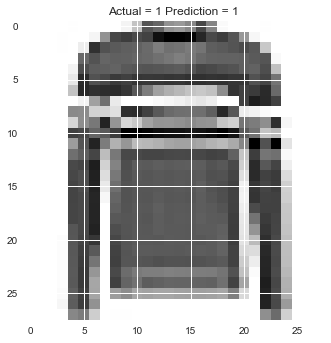

In [18]:
plt.imshow(x_train[5].reshape(x_train[5].shape[0], x_train[5].shape[1]))
plt.title("Actual = {} Prediction = {} ".format(y_test[5], y_pred[5]))
plt.show()